In [1]:
### This is the dataset regarding the Mass Shootings in the United States of America (1966-2017) taken from 
### "https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/downloads/Mass%20Shootings%20Dataset%20Ver%205.csv"
### The US has witnessed 323 mass shootings in last 50 years that resulted in 1,433 deaths and 1,955 injured. 
### The dataset contains detailed information of 323 mass shootings in the United States of America 
### from 1966 to 2017 that killed 1433 and injured 1955 people.

### Variables: The dataset contains Serial No, Title, Location, Date, Summary, Fatalities, Injured, Total Victims, 
### Policeman killed , age, employeed (Y/N) , Employed at , Mental Health Issue, Race, Gender, and Lat-Long information.
### Three things are clearly mentioned in the data. Shooter's information, Geographic location of the shootings,Associated number of affected people including law enfoecemts.

### The pivotal reason to pick and peform the analysis on the data is human safety which can be answered by the few questions:
### • How many people got killed and injured per year?
### • Is there any correlation between shooter and his/her race, gender, and age?
### • Any correlation with calendar dates? Do we have more deadly days, weeks or months on average?
### • What cities and states are more prone to such attacks
### • Can you find and combine any other external datasets to enrich the analysis, for example, gun ownership by state?
### • Any other pattern you see that can help in prediction, crowd safety or in-depth analysis of the event?
### • How many shooters have some kind of mental health problem? Can we compare that shooter with general population with same condition?

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv("Mass Shootings Dataset Ver 5.csv", encoding = "ISO-8859-1",parse_dates=["Date"])
print("Total Data: " + str(df.shape))
print("Total number of fatalities: " + str(sum(df["Fatalities"])))
print("Total number of Injuries: " + str(sum(df["Injured"])))
df.head()

Total Data: (323, 21)
Total number of fatalities: 1433
Total number of Injuries: 1995


,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [27]:
df.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


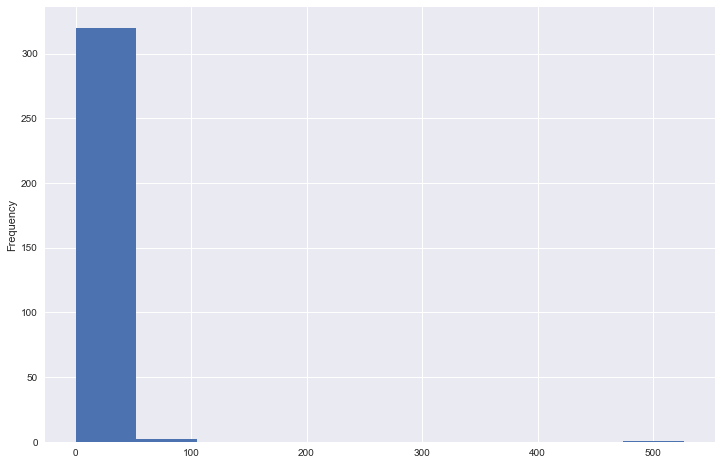

In [29]:
plt.figure(figsize=(12,8))
df["Injured"].plot(kind="hist")
plt.show()

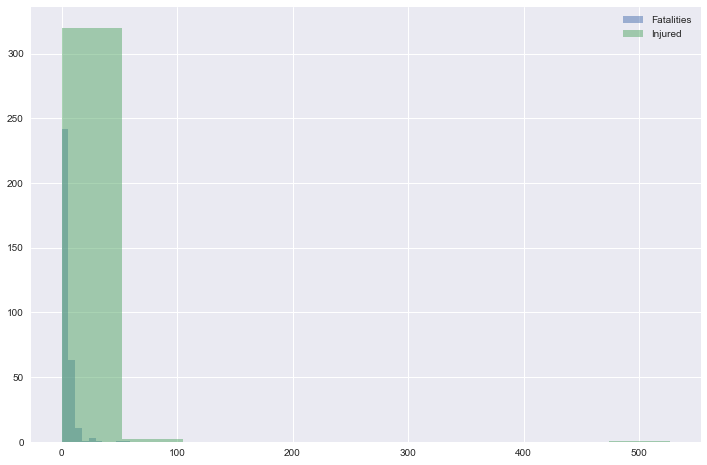

Ttest_indResult(statistic=1.0271645246649932, pvalue=0.30506038090345949)


In [58]:
sample1 = df["Fatalities"]
sample2 = df["Injured"]

plt.figure(figsize=(12,8))
plt.hist(sample1, alpha=0.5, label='Fatalities') 
plt.hist(sample2, alpha=0.5, label='Injured') 
plt.legend(loc='upper right') 
plt.show()

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))


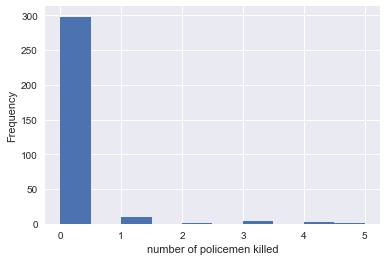

In [30]:
df["Policeman Killed"].plot("hist")
plt.xlabel("number of policemen killed")
plt.show()

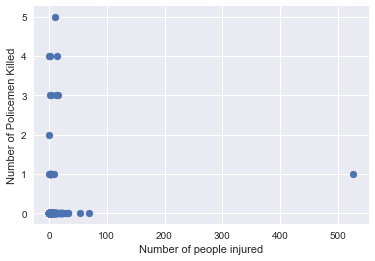

In [31]:
plt.scatter(x=df["Injured"], y =df["Policeman Killed"])
plt.xlabel("Number of people injured")
plt.ylabel("Number of Policemen Killed")
plt.show()

In [32]:

### Cleaning city and state
df['City'] = df['Location'].str.rpartition(',')[0]
df['State'] = df['Location'].str.rpartition(',')[2]


### Cleaning race
df["Race"].fillna("0",inplace=True)
df["Race"].replace(['0','white', 'black', 'Some other race', 'unclear','White ',
                    'Black American or African American/Unknown','White American or European American/Some other Race',
                    'Asian American/Some other race','Native American','White American or European American',
                    'Black American or African American','Asian American','Native American or Alaska Native',
                    'Two or more races'],
                   ['Unknown','White', 'Black', 'Other','Unknown','White',
                    'Black','White',
                    'Asian','Native American','White','Black','Asian','Native American',
                    'Other'], inplace=True)



#cleaning open and close
df["Open/Close Location"].replace(["Close","Open","Open+Close","Open+CLose"],["Close","Open","Both","Both"],inplace=True)
df["Open/Close Location"] = df["Open/Close Location"].fillna("XXX")



#cleaning target
df["Target"].replace(['random', 'coworkers', 'women', 'police', 'Family',
                      'uninvited guests', 'birthday party bus', 'Trooper', 'party guests',
                      'neighbors', 'club members', 'Policeman', 'Family/Neighbors',
                      'drug dealer', 'protestors', 'Students', 'Ex-Wife', 'Coworkers',
                      'Ex-Girlfriend', 'Marines', 'Ex-girlfriend', 'House Owner',
                      'Friends', 'Contestant', 'Ex-Girlfriend & Family',
                      'Ex-Wife & Family', 'Ex-Girlfriend+random', 'Family+random',
                      'rapper+random', 'TSA Officer', "partner's family", 'Girlfriend',
                      "Coworker's Family", 'Family+students', 'Ex-Coworkers', 'Sikhs',
                      'black men', 'Congresswoman', 'Policeman+Council Member',
                      'Students+Teachers', 'school girls', 'basketball players',
                      'Ex-GirlFriend', 'hunters', 'Teachers', 'Students+Parents',
                      'prayer group', 'psychologist+psychiatrist', 'lawyers',
                      'Social Workers', 'monks', 'Children', 'postmaster',
                      'welding shop employees'],
                     ["civilians","civilians","civilians","police","civilians",
                      "civilians","civilians","police","civilians",
                      "civilians","civilians","police","civilians",
                      "civilians","civilians","civilians","civilians","civilians",
                      "civilians","police","civilians","civilians",
                      "civilians","civilians","civilians",
                      "civilians","civilians","civilians",
                      "civilians","police","civilians","civilians",
                      "civilians","civilians","civilians","civilians",
                      "civilians","civilians","police",
                      "civilians","civilians","civilians",
                      "civilians","civilians","civilians","civilians",
                      "civilians","civilians","civilians",
                      "civilians","civilians","civilians","civilians",
                      "civilians"
                     ],inplace=True)

df["Target"] = df["Target"].fillna("XXX")


### mixing target and open close location
clean_target_OC = df[(df["Target"] != "XXX") & (df["Open/Close Location"] != "XXX")]



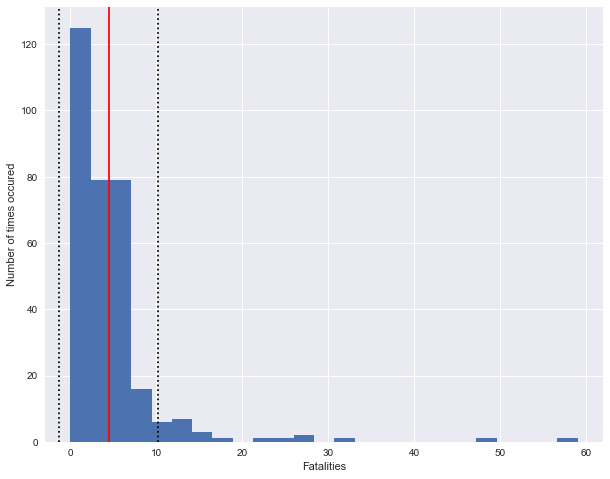

Mean: 4.436532507739938


In [33]:
plt.figure(figsize=(10,8))
plt.hist(df["Fatalities"],bins=25)
plt.xlabel("Fatalities")
plt.ylabel("Number of times occured")
plt.axvline(df["Fatalities"].mean(),color="red")
plt.axvline(df["Fatalities"].mean()+df["Fatalities"].std(),color="black",linestyle="dotted")
plt.axvline(df["Fatalities"].mean()-df["Fatalities"].std(),color="black",linestyle="dotted")
plt.show()

print("Mean: "+ str(df["Fatalities"].mean()))


In [34]:
df['Year'] = df['Date'].dt.year

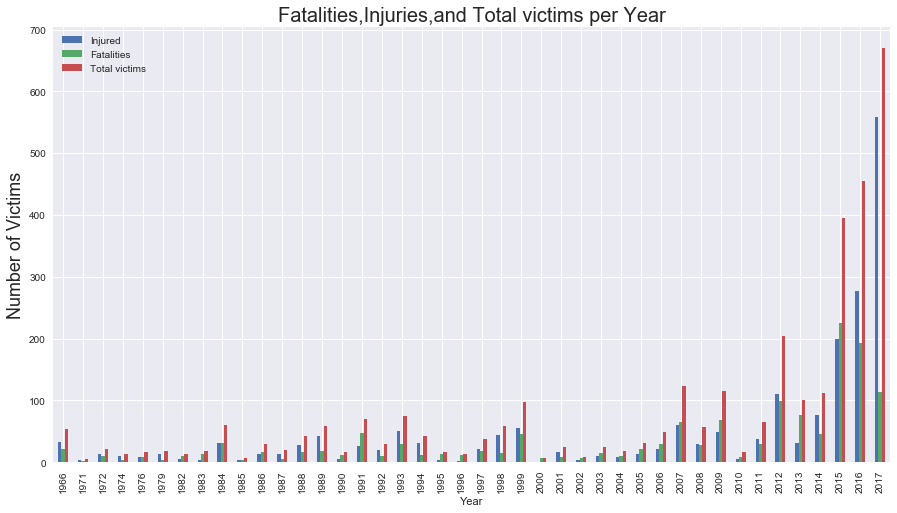

In [35]:
a = df[["Year","Injured","Fatalities","Total victims"]].groupby("Year").sum()
a.plot.bar(figsize=(15,8))
plt.ylabel('Number of Victims', fontsize=18)
plt.title('Fatalities,Injuries,and Total victims per Year', fontsize=20)
plt.show()



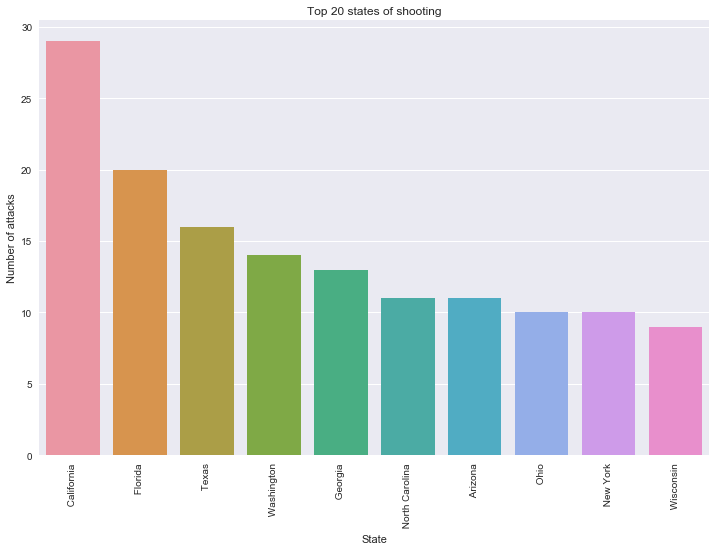

In [36]:
#Question :
### Which States are leading in number of shooting incidents?

a = df['State'].value_counts().head(10)

plt.figure(figsize=(12,8))
sns.barplot(a.index, a.values)

plt.xlabel('State')
plt.ylabel('Number of attacks')
plt.xticks(rotation='vertical')

plt.title('Top 20 states of shooting')
plt.show()

total attacks happened so far: 323


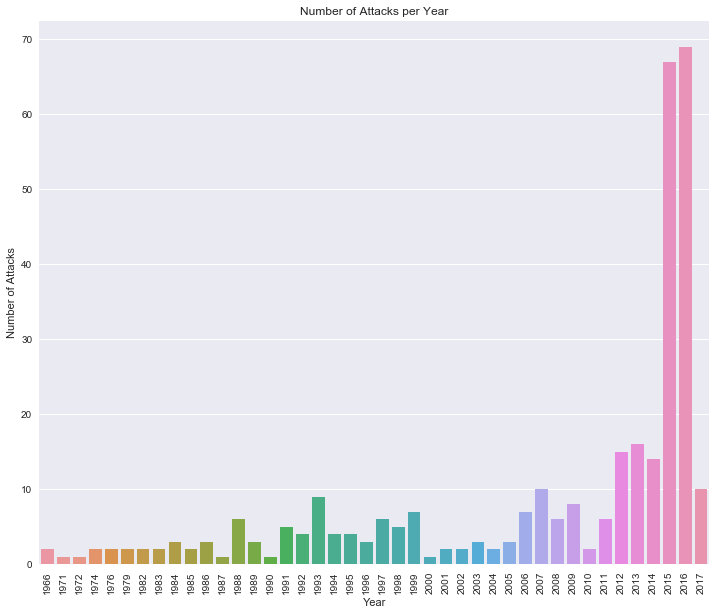

In [37]:
### Total number of attacks per year
df['Year'] = df['Date'].dt.year

b = df['Year'].value_counts()

plt.figure(figsize=(12,10))
sns.barplot(b.index, b.values)

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Year')
plt.xticks(rotation = "vertical")
print("total attacks happened so far: "+ str(sum(b.values)))

plt.show()


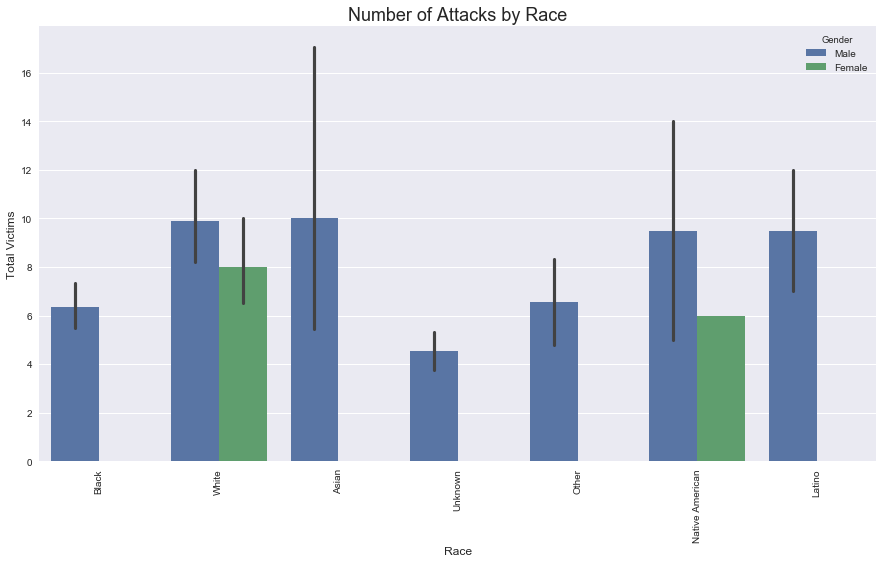

In [38]:
v = df[df["Gender"].isin(["Male","Female"])]

plt.figure(figsize=(15,8))  
sns.barplot(x = "Race",y = "Total victims",hue="Gender", data = v )

plt.xlabel('Race', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.xticks(rotation = "vertical")
plt.title('Number of Attacks by Race', fontsize=18)
plt.show()

C:\Users\harbhan dass\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


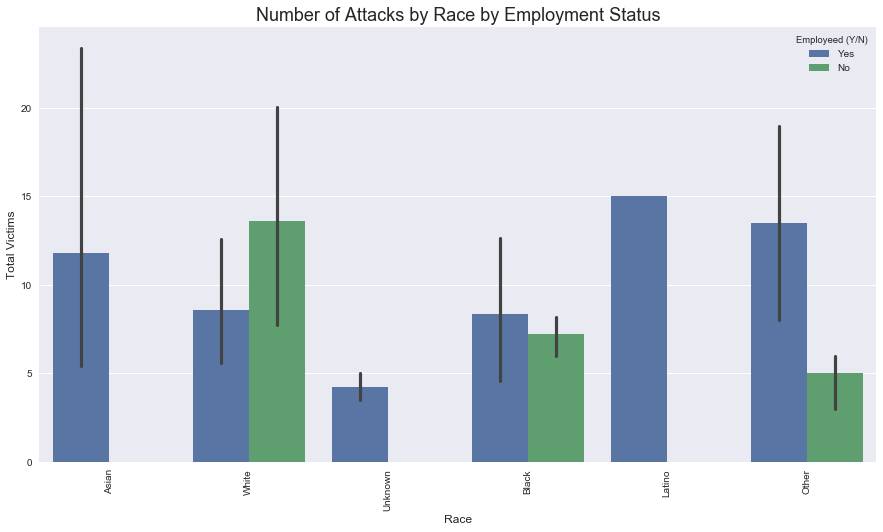

In [39]:
b = df[df['Employeed (Y/N)'].isin([0.0,1.0])]
b["Employeed (Y/N)"].replace([0.0,1.0],["No","Yes"],inplace=True)

plt.figure(figsize=(15,8))  
sns.barplot(x = "Race",y = "Total victims",hue="Employeed (Y/N)", data =b )

plt.xlabel('Race', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.title('Number of Attacks by Race by Employment Status', fontsize=18)
plt.xticks(rotation = "vertical")
plt.show()

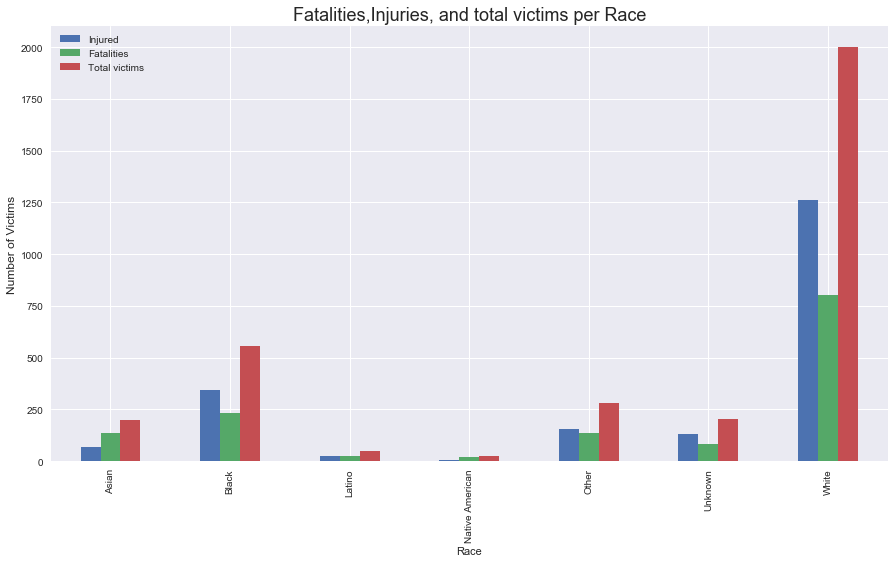

In [40]:
c = df[['Race', 'Injured', 'Fatalities','Total victims']].groupby('Race').sum()

c.plot.bar(figsize=(15,8))

plt.ylabel('Number of Victims', fontsize=12)
plt.title('Fatalities,Injuries, and total victims per Race', fontsize=18)
plt.show()

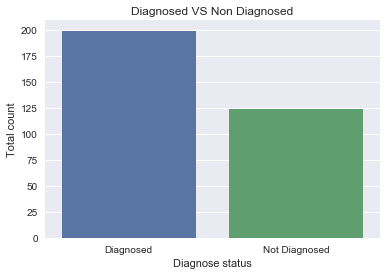

In [41]:
MHI = df["Mental Health Issues"].replace(["Yes","No","Unclear","Unknown","unknown"],
                                            ["Diagnosed","Diagnosed","Not Diagnosed","Not Diagnosed","Not Diagnosed"])

MHI_value = MHI.value_counts()
sns.barplot(MHI_value.index,MHI_value.values)
plt.ylabel("Total count")
plt.xlabel("Diagnose status")
plt.title("Diagnosed VS Non Diagnosed")
plt.show()


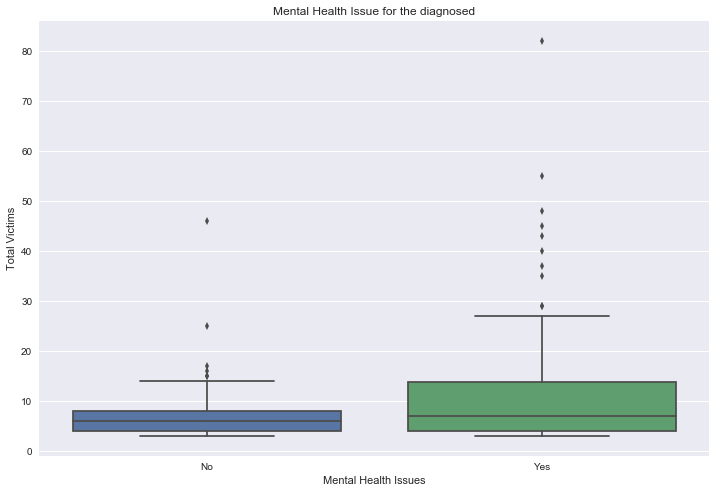

In [42]:
diagnosed = df[df["Mental Health Issues"].isin(["Yes","No"])]

plt.figure(figsize=(12,8))
sns.boxplot(x="Mental Health Issues", y="Total victims", data=diagnosed)

plt.xlabel("Mental Health Issues")
plt.ylabel("Total Victims")
plt.title("Mental Health Issue for the diagnosed")

plt.show()


In [43]:
### Question :

### What was the percentage that a shooter with Mental Health Issue opened fire ?
cc = df["Mental Health Issues"].value_counts()
percentage = sum(df["Mental Health Issues"] == "Yes") / sum(df["Mental Health Issues"]!= "Yes") * 100
print("Percentage that a shooter with Mental Health Issue opened fire: " + str(percentage)+ "%")

Percentage that a shooter with Mental Health Issue opened fire: 48.8479262673%


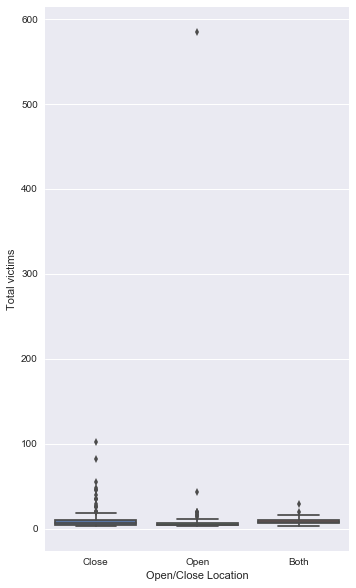

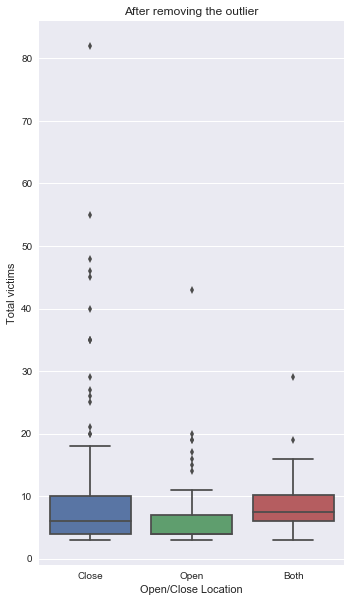

In [44]:
### Question 2: How do fatalities compare in locations that are open,closed,or both open and closed?

### are fataities higher in an only open or open and close location?
### are fataities higher in an only close or open and close location?

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.boxplot(x="Open/Close Location",y="Total victims",data=clean_target_OC)
plt.show()


plt.figure(figsize=(12,10))
plt.subplot(1,2,2)
fff = df[(df["Total victims"] < 100) & (df["Open/Close Location"] != "XXX")]
sns.boxplot(x="Open/Close Location",y="Total victims",data=fff)
plt.title("After removing the outlier")
plt.show()

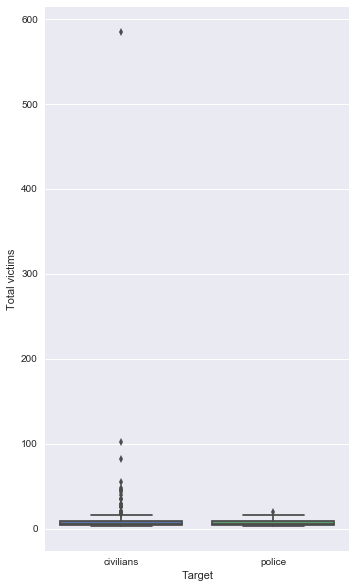

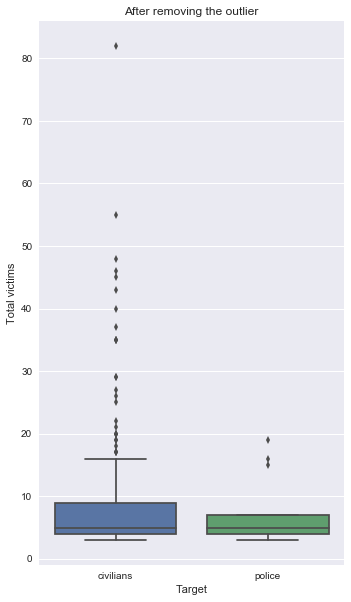

In [45]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.boxplot(x="Target",y="Total victims",data=clean_target_OC)
plt.show()



plt.figure(figsize=(12,10))
plt.subplot(1,2,2)
zzz = df[(df["Total victims"] < 100) & (df["Target"] != "XXX")]
sns.boxplot(x="Target",y="Total victims",data=zzz)
plt.title("After removing the outlier")
plt.show()

In [46]:
## Research questions:

### 1 Why the sharp jump in the shooting happened from 2015 omnwards? Did the US elections or polictics came into play?I would like to conduct the research on speeches which might have caused the racial hatredness among the the human beings?
### 2 Why have so many shooters not been diagnosed?